In [141]:
# Basic python library imports
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib notebook

import ipywidgets as widgets

# Usage Instructions

* Use "ALT+r" key combination to go to slideshow mode
* Use Spacebar (SHIFT+Spacebar) to go forward (backward) through the slideshow. 

[More info is available in the RISE documentation](https://damianavila.github.io/RISE/usage.html).

This notebook is available from https://github.com/stephensekula/pi_monte_carlo_lecture. To run in Binder, click the "Launch Binder" badge

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/stephensekula/pi_monte_carlo_lecture/master?filepath=pi_lecture.ipynb)


<img src="Images/Pi_Glass.png" style="width: 50%; height: auto; float: right;"/>

# Monte Carlo Techniques 

## Professor Stephen Sekula (SMU)

Guest Lecture - SMU Physics (PHYS) 4321/7305 

# What are “Monte Carlo Techniques”?


* Computational algorithms that rely on repeated random sampling in order to obtain numerical results

* Basically, you run a scenario of some kind over and over again to calculate the possible outcomes, either based on probability or to determine probability

* Like playing a casino game over and over again and recording all the game outcomes to determine the underlying rules of the game

* Monte Carlo is a city famous for its gambling - hence the name of this class of techniques


<center>
<img src="Images/MC-Examples.jpg" style="width: 80%; height: auto;" />
</center>

# A Question

## Have you ever (knowingly) used "Monte Carlo techniques"?

# Ever played "Battleship"?

<table>
    <tr>
        <td style="width: 40%;">
            <img src="Images/Battleship.jpg" style="width: 100%; height: auto;"/>
        </td>
        <td style="width: 30%">
            <p style="font-size: 32px;">
            Two opponents try to sink each others' ships by dropping torpedos on grid locations.
            </p>
        </td>
        <td style="width: 30%;">
            <img src="Images/Battleship-game.jpg" style="width: 100%; height: auto;"/>
        </td>
    </tr>    
</table>

The finding and sinking of ships is a Monte Carlo process. Especially at the beginning, you are forced to throw a random torpedo onto the grid because you don't know your opponent's layout. The more torpedos you throw, the more confident you become in the opponent's layout.


# Computing $\mathbf{\pi}$ by Monte Carlo Techiques

# A Simple Physical Example

* Let's illustrate this class of techniques with a simple physical example: numerical computation of $\pi$

* $\pi$: the ratio of the circumference of a circle to its diameter: {{math.pi}}...

* It's difficult to whip out a measuring tape or a ruler and accurately measure the circumference of an arbitrary circle.

* The Monte Carlo method avoids this problem entirely

# Illustration of the Method

Begin by drawing a square. The properties of the square are very easy to measure or establish.

In [142]:
def figureObject():
    return plt.subplots(figsize = (4,4))

def configureAxes(axes=None):
    if axes == None:
        print("No axis object provided")
        return
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    return


<IPython.core.display.Javascript object>


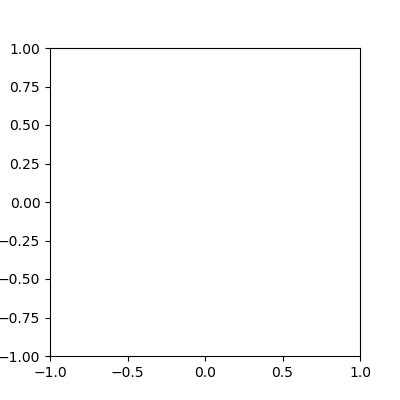

In [143]:
fig, ax = figureObject()
configureAxes(axes=ax)
plt.show()

# Illustration of the Method

Inscribe a circle inside the square.

In [144]:
def circleObject():
    return plt.Circle((0, 0), 1.0, color='k', fill=False)

def inscribeCircle():
    circle1 = circleObject()

    fig, ax = figureObject()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    ax.add_artist(circle1)

    plt.show()
    
    return ax

<IPython.core.display.Javascript object>


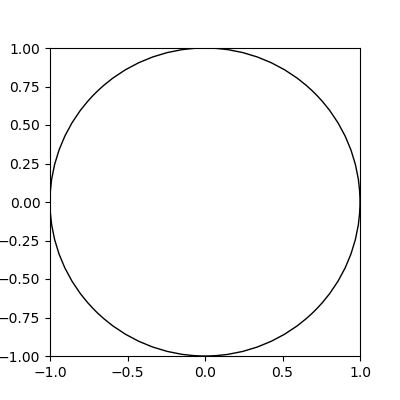

In [145]:
inscribeCircle()
configureAxes(axes=ax)
plt.show()

Let's take stock of what we know mathematically about the above picture.

# Taking Stock of the Inscribed Circle

Because the circle is *inscribed*, it touches the square at exactly 4 points. If the length of a side of the square is $2r$, then the radius of the circle is, by definition, $r$. For my picture, I have defined a square so as to get a *unit circle*.

We know the mathematical relationship between the *radius* of the circle and a point, $(x,y)$, on the boundary of the circle.

$$r = \sqrt{x^2 + y^2}$$

In [146]:
def inscribeCircleWithArrow():
    circle1 = circleObject()
    r=1.00
    x=0.50
    y=math.sqrt(r**2-x**2)
    arrow1 = plt.Arrow(0,0,x,y,color='g',width=0.1)

    fig, ax = figureObject()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])

    ax.add_artist(circle1)
    ax.add_artist(arrow1)
    plt.show()

<IPython.core.display.Javascript object>


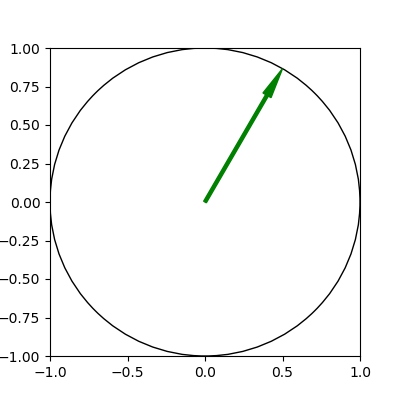

In [147]:
inscribeCircleWithArrow()

## Knowns (so far):

$$\color{green}{r = \sqrt{x^2 + y^2}}$$

Let us imagine that we have a way of randomly throwing a dot into the square (imagine a game of darts being played, with the square as the board...)

It must be completely random, with no bias toward a particular number in $x$ or $y$ or a region of $(x,y)$ space.


In [148]:
def throwDot(x=100, y=100):
    this_x = 0
    this_y = 0
    if (math.fabs(x)>1 or math.fabs(y)>1):
        this_x = numpy.random.uniform(-1,1)
        this_y = numpy.random.uniform(-1,1)
    else:
        this_x = x
        this_y = y
    color = 'r'
    if math.sqrt(this_x**2 + this_y**2) > 1.0:
        color = 'b'
    dot = plt.Circle((this_x, this_y), 0.05, color=color, fill=True)
    return dot

<IPython.core.display.Javascript object>


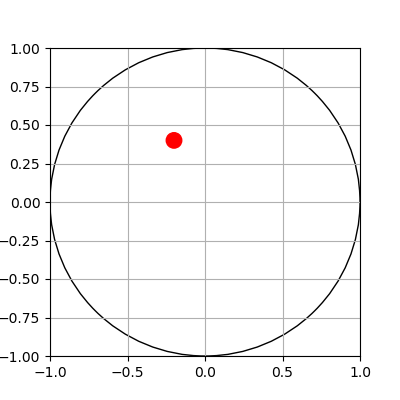

In [149]:
ax = inscribeCircle()
ax.add_artist(throwDot(-0.2,0.4))
plt.grid()
plt.show()

There is a probability that a uniformly, randomly thrown dot will land in the circle (or on its boundary), and a probability that it will land out of the circle. What are those probabilities?


# Probabilities

The probability (P) of landing in the circle ("in") given ("|") that a dot is somewhere on the square ("dot") is merely given by the ratio of the areas of the two objects:

\begin{eqnarray}
P(\mathrm{\left. in \right| dot}) & = & \frac{A_{circle}}{A_{square}} \\
\end{eqnarray}

\begin{eqnarray}
 & = & \frac{\pi r^2}{(2r)^2} \\
\end{eqnarray}

\begin{eqnarray}
 & = & \frac{\pi}{4} \\
\end{eqnarray}

## Knowns (so far):

$$\color{green}{r = \sqrt{x^2 + y^2}}$$

\begin{eqnarray}
\color{green}{P(\mathrm{\left. in \right| dot})} & \color{green}{=} & \color{green}{\frac{\pi}{4}} \\
\end{eqnarray}

That's nice that we can *geometrically* write a formula to determine this probability, but it doesn't help us to figure out $\pi$ - after all we have one equation and two unknowns. We are missing a piece... 

*... just what is that probability on the left side? How can we determine it?*

**In other words:** Is there a way to determine   the value of $P(\mathrm{\left. in \right| dot})$ *independently* so that we might then get at $\pi$?

# Determine P(in|dot) Numerically

We can figure out this probability by literally throwing dots, via some unbiased process, into the square and then counting...
1. The number that land inside the circle or on its boundary ($N_{in}$)
1. The number that land outside the circle but still on the square gameboard ($N_{out}$)

Then divide the number in the circle by the total number of dots to get at P(in|dot):

$$P(\mathrm{\left. in \right| dot}) = \frac{N_{in}}{N_{in}+N_{out}} = \frac{N_{in}}{N_{total}}$$

In [150]:
button = widgets.Button(
    description='Add Random Dot',
)

global game_axes
game_axes = None

@button.on_click
def addRandomDot(b):
    global game_axes
    game_axes.add_artist(throwDot())

<IPython.core.display.Javascript object>


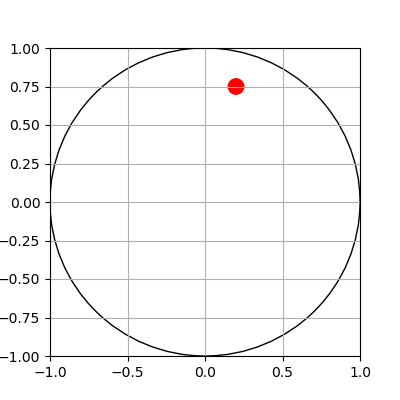

In [151]:
game_axes = inscribeCircle()
game_axes.add_artist(throwDot(0.2,0.75))
plt.grid()
plt.show()
widgets.VBox(children=[button])

# Determining $\mathbf{\pi}$ Numerically

We combine our two pieces of information:

$$P(\mathrm{\left. in \right| dot}) = \frac{\pi}{4}$$

and

$$P(\mathrm{\left. in \right| dot}) = \frac{N_{in}}{N_{total}}$$

Rearrange to solve for $\pi$ from this numerical approach:

$$\pi = 4 \frac{N_{in}}{N_{total}}$$

# The Pieces

* Random numbers
   * needed to “throw dots” at the board

* Uniformity of coverage
   * we want to pepper the board using uniform random numbers, to avoid creating artificial pileups that create new underlying probabilities ("biasing the outcome")

* Code/Programming
   * You can do this manually with a square, an inscribed circle, coordinate axes, and a many-sided die.
   * But that limits your time and precision - computers are faster for such repetitive tasks

# A Computational Approach

# Tools

* A programming language (Python)
* A Jupyter notebook that allows you to play around with the programming exercises as we go forward: [https://jupyter.physics.smu.edu](https://jupyter.physics.smu.edu)

Python is free and open-source - you can install it on any platform you own (Windows, Mac, Linux, and even many mobile platforms like iOS and Android). Jupyter is just a framework for providing interactive access to an underlying programming language. 

# Basics of Programming ("Coding")

* Numbers – all programming languages can minimally handle numbers: integers, decimals

* Variables – placeholders for numbers, whose values can be set at any time by the programmer

* Functions – any time you have to repeatedly perform an action, write a function. A “function” is just like in math – it represents a complicated set of actions on variables

* Code – an assembly of variables and functions whose goal is determined by the programmer. “Task-oriented mathematics”

* Coding is the poetry of mathematics – it takes the basic rules of mathematics and does something awesome with them.

# Python and Jupyter

* Python is a programming language

* Jupyter is a framework for developing web-based interactive python software

* We will use Python and Jupyter together today. I think it makes programming more fun and also more share-able.

* Jupyter notebooks can be shared with other people, who can improve them and share them again.

# Running on the SMU Physics JupyterHub Server

# Login to the SMU High-Performance Computing System

[hpc.smu.edu](https://hpc.smu.edu)

![](Images/jupyter_physics_login.png)



# Start a Jupyter Notebook and Upload the Code

Upload this code (and accompanying graphics and files) to ManeFrame and then click on it to run.

![](Images/jupyter_folder_select.png)


# Select the notebook to play with the code

![](Images/jupyter_notebook_select.png)


# Running on Binder (MyBinder.org)

Visit [github.com/stephensekula/pi_monte_carlo_lecture](https://github.com/stephensekula/pi_monte_carlo_lecture) and click the "Launch Binder" badge. This will take several minutes to start.
![](Images/github-launch-binder.png)

# Run the Notebook all the way through TWICE

Click the "Cell" menu item at the top of the notebook. Select ```"Cell->Run All"```. This will execute every cell in the notebook from the first to the last. 

Do the above TWICE.

When it's done, scroll up until you find the section entitled **"Python Coding Basics"**

# Building Up the Code

# Python Coding Basics
## variables, values, printing

In [152]:
# A line beginning with a "#" symbol is a comment ->  non-executing statement!
Ntotal = 100
# Print the value of the variable, Ntotal, using the print() function defined in Python:
print(Ntotal)
# Double-click this cell to edit the code, change the value of Ntotal, and play around!

100


## Arithmetic Operations

In [153]:
# Define a new variable, Nin, and set its value
Nin = 55.0
# Print an arithmetic operation using Nin and Ntotal
print(Nin/Ntotal)
# Double-click this cell to edit the code and try other operations!
# +  ADDITION
# -  SUBTRACTION
# *  MULTIPLICATION
# /  DIVISION
# **N  RAISE TO THE POWER OF N, e.g. x**2 is x*x

0.55


## Random Numbers: Uniformly Distributed Random Numbers

In [154]:
uniform_random_button = widgets.Button(
    description='Uniform in [0,1]',
)

@uniform_random_button.on_click
def generateUniformRandomNumber(b):
    print(random.uniform(0.0,1.0))

In [155]:
import random
print( random.uniform(0.0,1.0) )


# Create a little widget holding a button that lets me repeatedly generate a new random number
widgets.VBox(children=[uniform_random_button])

# ...or, just keep single-clicking this cell and executing it again using SHIFT+ENTER on your keyboard

0.6002274090850865


## Defining our "Game Board"

![](Images/game_board_original.png)

## Simplifying our "Game Board"

![](Images/game_board_alt.png)

## Generating "dots" - uniform random x, random y, and calculate $\mathbf{r}$

In [156]:
import math
import random
Ntotal = 100
Nin = 0

x = random.uniform(0.0,1.0)
y = random.uniform(0.0,1.0)
# To take the square-root, use the predefined math function math.sqrt():
r = math.sqrt(x**2 + y**2)

print(f"x = {x}")
print(f"y = {y}")
print(f"r = {r}")

# Execute me over and over by clicking on this cell and using SHIFT+ENTER on your keyboard.

x = 0.8083163103473187
y = 0.6381630026323324
r = 1.0298676009576264


## Lists of numbers and the range() function for generating sequences

If you want to generate a series of numbers in a sequence, e.g. 1,2,3,4..., then you want the range() *immutable sequence type* (or its equivalent in some other Python library). See the example below. ```range()``` doesn't directly create a list of numbers; it is its own type in Python. To get a list from it, see below.

In [157]:
# Manual list
my_list = [1,2,3,4,5]
print("Hand-generated list:  ", my_list)

list_of_numbers=list(range(1,5))
print("List from range(1,5): ", list_of_numbers)

# Note that the list EXCLUDES the end-point (5). If you want to get a list of 5 numbers, from 1-5, 
# then you need to extend the end-point by 1 (from 5 to 6):

list_of_numbers=list(range(1,6))
print("List from range(1,6): ", list_of_numbers)

# or this

list_of_numbers=list(range(0,5))
print("List from range(0,5): ", list_of_numbers)


Hand-generated list:   [1, 2, 3, 4, 5]
List from range(1,5):  [1, 2, 3, 4]
List from range(1,6):  [1, 2, 3, 4, 5]
List from range(0,5):  [0, 1, 2, 3, 4]


## Repetition in Code: Loop Structures

*  You don't want to manually type 100 (or more) computations of your dot throwing
* You need a loop!
* A “loop” is a small structure that automatically repeats your computation a specified number of times

In [158]:
for i in [0,1,2,3,4]:
    print(i)
    print(i+1)

0
1
1
2
2
3
3
4
4
5


## Putting things together: "looping" 100 times and printing r each time

Let's put things together now. We can create a variable that stores the number of iterations ("loops") of the calculation we want to do. Let's call that ```Ntotal```. Let's then loop 100 times and each time make a random ```x```, random ```y```, and from that compute $r=\sqrt{x^2+y^2}$.

Note that Python uses indentation to indicate a related block of code acting as a "subroutine" - a program within the program.

In [159]:
import math
import random
Ntotal = 100
Nin = 0
# Use a for-loop to automatically execute the same block of code a bunch of times:
for i in range(0,Ntotal):
    x = random.uniform(0.0,1.0)
    y = random.uniform(0.0,1.0)
    r = math.sqrt(x**2 + y**2)
    print("x=%f, y=%f, r=%f" % (x,y,r))

x=0.942497, y=0.424027, r=1.033489
x=0.786256, y=0.251415, r=0.825475
x=0.772880, y=0.375565, r=0.859298
x=0.150604, y=0.930299, r=0.942411
x=0.468232, y=0.029691, r=0.469173
x=0.712960, y=0.634353, r=0.954314
x=0.654180, y=0.067048, r=0.657607
x=0.287231, y=0.809717, r=0.859153
x=0.967250, y=0.259213, r=1.001381
x=0.417216, y=0.404494, r=0.581106
x=0.003024, y=0.125346, r=0.125383
x=0.206028, y=0.740930, r=0.769041
x=0.031742, y=0.182777, r=0.185513
x=0.690940, y=0.274866, r=0.743606
x=0.250967, y=0.640274, r=0.687703
x=0.717002, y=0.802979, r=1.076507
x=0.893893, y=0.387661, r=0.974333
x=0.663865, y=0.833584, r=1.065636
x=0.864214, y=0.520503, r=1.008855
x=0.623297, y=0.152726, r=0.641735
x=0.889244, y=0.006684, r=0.889269
x=0.783483, y=0.176781, r=0.803179
x=0.983151, y=0.391735, r=1.058321
x=0.805200, y=0.540464, r=0.969767
x=0.883845, y=0.093176, r=0.888743
x=0.370076, y=0.040293, r=0.372263
x=0.819791, y=0.363954, r=0.896951
x=0.043248, y=0.387427, r=0.389833
x=0.093016, y=0.4898

## Making this into a Monte Carlo Calculation: The Accept/Reject Method

Now that we can make random "dots" in x,y and compute the radius (relative to 0,0) of each dot, let's employ "Accept/Reject" to see if something is in/on the circle (a "HIT"!) or outside the circle (a "MISS"!). 

All we have to do is:

* for each $r$, test whether $r \le R$ or $r > R$. 
   * If the former, we have a dot in the circle - a hit! 
   * If the latter, then we have a dot out of the circle - a miss! 
* We "accept" the hits and reject the misses. 
* The total number of points, (x,y), define all the moves in the game, and the ratio of hits to the total will tell us about the area of the circle, and thus get us closer to $\pi$.

In [160]:
Ntotal = 100000 # Do this many "trials" (dot throws)
Nin = 0 # Default Nin to zero
R = 1.0 # Unit Circle Radius = 1.0
for i in range(0,Ntotal):
    x = random.uniform(0.0,1.0)
    y = random.uniform(0.0,1.0)
    r = math.sqrt(x**2 + y**2)

    if r <= R:
        Nin = Nin + 1
        # alternatively, Nin += 1 (auto-increment by 1)

print(f"Number of dots: {Ntotal}")
print(f"Number of hits: {Nin}")
Nmiss = Ntotal - Nin
print(f"Number of misses: {Nmiss}")
        
# Now, compute pi using pi = 4*(N_in/N_total)
my_pi = 4.0*float(Nin)/float(Ntotal)
print(f"pi = {my_pi}")

Number of dots: 100000
Number of hits: 78663
Number of misses: 21337
pi = 3.14652


A working program! You can increase ```Ntotal``` (standing in for $N_{in}+N_{out}$) to increase the precision of your computation.

# Additional Topics (As Time Allows)

## Defining a "function" in Python

You can define a custom function in Python to wrap up our masterpiece, and then run the code, passing new parameters, just by calling the function. For example:

In [161]:
def computePi(Ntotal=100, silent=False):
    Nin = 0 # Default Nin to zero
    R = 1.0 # Unit Circle Radius = 1.0
    for i in range(0,Ntotal):
        x = random.uniform(0.0,1.0)
        y = random.uniform(0.0,1.0)
        r = math.sqrt(x**2 + y**2)
        if r <= R:
            Nin += 1

    Nmiss = Ntotal - Nin
    my_pi = 4.0*float(Nin)/float(Ntotal)
    if False == silent:
        print(f"Throws: {Ntotal}; Hits: {Nin}; Misses: {Nmiss}; Pi = {my_pi}")
    return [Ntotal, Nin, my_pi]

# call the function
computePi(Ntotal=100)
computePi(Ntotal=1000)
computePi(Ntotal=10000)

Throws: 100; Hits: 81; Misses: 19; Pi = 3.24
Throws: 1000; Hits: 799; Misses: 201; Pi = 3.196
Throws: 10000; Hits: 7822; Misses: 2178; Pi = 3.1288


[10000, 7822, 3.1288]

## Precision in Monte Carlo Simulation

The number above is probably close to what you know as $\pi$, but likely not very precise. After all, we only threw 100 dots. We can increase precision by *increasing the number of dots*. In the code block below, feel free to play with ```Ntotal```, trying different values. Observe how the computed value of $\pi$ changes. Would you say it's "closing in" on the value you know, or not? Try ```Ntotal``` at 1000, 5000, 10000, 50000, and 100000.

In the code block below, I have also added a computation of *statistical error*. The error should be a *binomial error*. Binomial errors occur when you have a bunch of things and you can classify them in two ways: as $A$ and $\bar{A}$ ("A" and "Not A"). In our case, they are hits or "not hits" (misses). So binomial errors apply. Let's look at the details.

# Applying Binomial Errors to the Pi Computation

Given finite statistics (a non-infinite number of trials), each set of trials (e.g. ```Ntotal=100```) carries an uncertainty on the computed value of $\pi$, $\pi_{est}$, such that we should really quote ($\pi_{est} \pm \sigma_{\pi}$). Since the number of points that land *inside or on* the circle is a subset of the total number thrown, $N_{in}$ and $N_{total}$ have to be treated using *binomial errors* (a dot can be in 1 of 2 non-overlapping states: in or out of the circle).

$$ \sigma_{\pi} = \sqrt{N_{total} \cdot p(1-p)}$$

where $p = P(\left. in \right| dot) = N_{in}/N_{total}$.

If we propagate this into $\pi_{est}$, we obtain:

$$\sigma_{\pi} = 4 \sigma_{N_{in}}/N_{total} = 4\sqrt{\frac{N_{in}}{N^2_{total}} \left( 1 - \frac{N_{in}}{N_{total}}\right)}$$

# Relative Error on $\mathbf{\pi_{est}}$

The *relative error* is the ratio of the uncertainty to the estimated value, e.g. $\sigma_{\pi}/\pi_{est}$. That is given by:

$$\frac{\sigma_{\pi}}{\pi_{est}} = \sqrt{\frac{1}{N_{in}}-\frac{1}{N_{total}}}$$

In [162]:
def computePiBinomialError(Ntotal=100):
    my_pi_data = computePi(Ntotal, silent=True)
    # Bonus: use Binomial Error calculation to determine numerical uncertainty on pi!
    Nin = my_pi_data[1]
    my_pi = my_pi_data[2]
    my_pi_uncertainty = my_pi * math.sqrt(1.0/float(Nin) + 1.0/float(Ntotal))
    my_pi_relative_uncertainty = 100*(my_pi_uncertainty/my_pi)
    output_text = f"pi = {my_pi:.6f} +/- {my_pi_uncertainty:.6f} (percent error= {my_pi_relative_uncertainty:.2f}%)"
    return output_text

trial_100 = computePiBinomialError(Ntotal=100)
trial_1000 = computePiBinomialError(Ntotal=1000)
trial_10000 = computePiBinomialError(Ntotal=10000)
trial_100000 = computePiBinomialError(Ntotal=100000)

* For 100 trials: {{trial_100}}
* For 1000 trials: {{trial_1000}}
* For 10000 trials: {{trial_10000}}
* For 100000 trials: {{trial_100000}}

Note that the uncertainty scales as $1/\sqrt{N_{total}}$.

# Why is this powerful?

* You have just learned how to *compute an integral numerically*
* You can apply this technique to *any function whose integral (area) you wish to determine*
* Consider the example on the next slide...

Aside: Imagine if you had learned this earlier – how much better a homework result could you have prepared by attacking problems both analytically AND numerically?

# A General Approach

<center>
    <img src="Images/general_function.png" style="width: 60%; height: auto;"/>
</center>

*  Given an arbitrary function, f(x), determine its integral numerically using the “Accept/Reject Method”
   * First, find the maximum value of the function (e.g. either analytically, if you like, or by calculating the value of f(x) over steps in x to find the maximum value, which I denote F(x))
   * Second, enclose the function in a box, h(x), whose height is F(x) and whose length encloses as much of f(x) as is possible.
   * Third, compute the area of the box (easy!)
   * Fourth, throw points in the box using uniform random numbers. Throw a value for $x$, denoted $x^{\prime}$. Throw a value for $y$, denoted $y^{\prime}$. If $y^{\prime} < f(x^{\prime})$, it's a hit! If not, it's a miss!


# A General Approach

<center>
    <img src="Images/general_function.png" style="width: 60%; height: auto;"/>
</center>

$$\frac{N_{hits}}{N_{total}} = \frac{I(f(x))}{A(h(x))}$$

This, in the real world, is how physicists, engineers, statisticians, mathematicians, etc. compute integrals of
arbitrary functions. **Learn it. Love it. It will save you.**


# Simulating Experiments - Another Use of Monte Carlo Techniques

* The Monte Carlo technique, given a function that represents the probability of an outcome, can be
used to generate “simulated data”
* Simulated data is useful in designing an experiment (e.g. during the design phase, when it's too expensive to prototype the entirety of a one-of-a-kind instrument), or even “running” an experiment over and over to see all possible outcomes



# Simulating the Double-Slit Wave Interference Experiment

<table>
    <tr>
        <td>
            <div   style="font-size: 32px;">
            <ul>
                <li>Consider slits of width, b, separated by a distance, d. Light of wavelength, $\lambda$, can pass through the slits.</li>
                <li>We want to know the intensity of light in the resulting pattern as a function of scattering angle, $\theta$. Denote this intensity $I(\theta)$.
                <li>$I(\theta)$ is a measure of the <em>probability of finding a photon scattered at the angle $\theta$</em></li>
            </ul>
            </div>
        </td>
        <td style="width: 40%">
            <center>
            <img src="Images/double_slit_interference.png" style="width: 100%; height: auto;"/>
            </center>
        </td>
    </tr>    
</table>

On the next page we see the "theoretical prediction" of what will happen in then next experiment based on a mathematical description of past experiments. We want to then simulate the "next experiment"...


# Simulating the Double-Slit Wave Interference Experiment

<table>
    <tr>
        <td>
            <div   style="font-size: 32px;">
            $$I(\theta) \propto \cos^2 \left(\frac{\pi d \sin(\theta)}{\lambda}\right)\mathrm{sinc}^2\left(\frac{\pi b \sin(\theta)}{\lambda}\right)$$
            where 
            $$\mathrm{sinc}(x) \equiv \begin{cases} \sin(x)/x \; (x \ne 0) \\ 1 \; (x=0) \end{cases}$$            </div>
        </td>
        <td style="width: 20%">
            <center>
            <img src="Images/double_slit_interference.png" style="width: 100%; height: auto;"/>
            </center>
        </td>
    </tr>    
</table>



## Next Steps

* Need the maximum value of $I(\theta)$ $\longrightarrow$ occurs when $\theta=0$ (for example)
*  Use that to compute the height of the box; the width of the box is $\pi$ (ranging from $-\pi/2$ to $+\pi/2$)
* “Throw” random points in the box until you get 1000 “accepts”
* Now you have a “simulated data” sample of 1000 photons scattered in the two-slit experiment.


# Implementation of the Double-Slit Monte Carlo Approach

In [163]:
def sinc(x):
    if x == 0.0:
        return 1
    else:
        return math.sin(x)/x

def Intensity(theta, wavelength=500e-9, b=1.0e-6, d=0.01):
    # wavelength is the light wavelength in meters
    # b is the slit-width (in meters)
    # d is the separation distance between slits (in meters)
    return (math.cos((math.pi * d * math.sin(theta))/wavelength)**2 * sinc((math.pi*b*math.sin(theta))/wavelength)**2)

global photon_list, wavelength, slit_width, slit_spacing, photon_plot, photon_figure
photon_list = numpy.array([])
wavelength = 500e-9
slit_width=1e-6
slit_spacing=0.01

# Generate a number of Double-Slit photons
# add each new one to a data list
# plotting the list as a histogram using MatPlotLib

global photon_max
slider_label_style = {'description_width': 'initial'}
photon_max = widgets.FloatLogSlider(
    value=1.,
    base=10,
    min=0.,
    max=5.,
    step=0.2,
    description='Photons To Generate:',
    style=slider_label_style,
    layout=widgets.Layout(width='50%', height='30px')
)

photon_button = widgets.Button(
    description='Generate Scattered Photons',
    layout=widgets.Layout(width='50%', height='30px')
)


@photon_button.on_click
def DoubleSlitPhoton(button_object):
    global photon_list, wavelength, slit_width, slit_spacing, photon_plot, photon_figure, photon_max
    # Generate a single double-slit scattered photon
    I_max = Intensity(0,wavelength, slit_width, slit_spacing)
    
    photon_count = 0
    theta = -999.
    while photon_count < photon_max.value:
        theta = numpy.random.uniform(-math.pi/2, math.pi/2)
        I_generated = numpy.random.uniform(0, I_max)
        if I_generated < Intensity(theta, wavelength, slit_width, slit_spacing):
            photon_count += 1
            photon_list = numpy.append(photon_list, theta)

    # update the histogram plot
    yields, bins = numpy.histogram(photon_list, bins=500, range=(-math.pi/2, math.pi/2))
    bincenter = lambda x, i: x[i]+(x[i+1] - x[i])/2.0
    bincenters = [bincenter(bins, i) for i in range(0, len(bins)-1)]
    #photon_plot.hist(x=photon_list, bins=100, color=['k'])
    plt.cla()
    photon_plot.scatter(x=bincenters, y=yields, color=['k'])
    photon_plot.set_xlim(-math.pi/2, math.pi/2)
    photon_plot.set_xlabel("Scattering Angle (radians)")
    photon_plot.set_ylabel("Number of Scattered Photons per radian")
    plt.grid()

    photon_figure.canvas.draw()

Slit width (b): {{slit_width}}m ; Slit Spacing (d): {{slit_spacing}} m ; Light wavelength ($\lambda$): {{wavelength/1e-9}} nm 

<IPython.core.display.Javascript object>


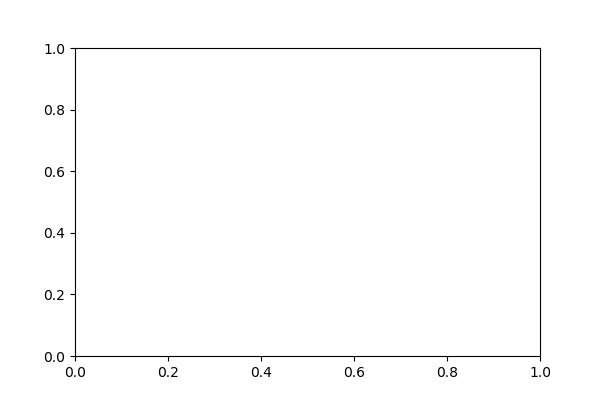

In [164]:
photon_figure, photon_plot = plt.subplots(figsize = (6,4))
widgets.VBox(children=[photon_button, photon_max])